In [1]:
import scipy as scipy
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt 

from scipy.stats import genextreme as gev
from netCDF4 import Dataset


In [2]:
CaMaFile = Dataset('fldare1161.nc')
# print(CaMaFile.dimensions.keys())

lat =  CaMaFile.variables['lat'][:] 
lon = CaMaFile.variables['lon'][:] 

# Read in Matlab Data

In [5]:
#matData   = sio.loadmat('/Users/meganfowler/Documents/MATLAB/FloodProject/CaMaFlood/Physiology/30yr/control_outflw.mat')

matData   = sio.loadmat('control_outflw.mat')
maxYearly = matData['maxYearly_full']

fullData   = sio.loadmat('full_outflw.mat')
fullYearly = fullData['maxYearly_full']

physData = sio.loadmat('physiology_outflw.mat')
physYearly = physData['maxYearly_full']

radData = sio.loadmat('radiation_outflw.mat')
radYearly = radData['maxYearly_full']

# print(maxYearly.shape)


# Fit GEV 
The function gev.fit will return the three parameters of the GEV: [0] Shape, [1] Location, and [2] Scale

gev.ppf will return the inverted CDF value given a q value that's between 0 and 1. 

In [9]:
# TEST CASE 

i=800;j=400;
rec = maxYearly[i,j]
gev_fit = gev.fit(rec)
K = gev_fit[0]
M = gev_fit[1]
S = gev_fit[2]
print(gev_fit)

retPeriod = 100.0

R100test = gev.ppf((1-(1/retPeriod)),K,loc=M,scale=S)

recFull = fullYearly[i,j]
gev_fitFull = gev.fit(recFull)

CDFfull = gev.cdf(R100test,*gev_fitFull)
T = 1/(1-CDFfull)
print(T)

(-0.8042402812803544, 3.3576293192513486e-05, 1.533450031574482e-05)
48.41873261615124


In [6]:
#Specify return period 
retPeriod = 100.0

# Define empty arrays to save data into
K    = np.empty([len(lon),len(lat)])
M    = np.empty([len(lon),len(lat)])
S    = np.empty([len(lon),len(lat)])
R100 = np.empty([len(lon),len(lat)])

Tfull = np.empty([len(lon),len(lat)])
Tphys = np.empty([len(lon),len(lat)])
Trad = np.empty([len(lon),len(lat)])

i=0
while i<len(lon):
    j=0
    while j<len(lat):
        
        # Compute GEV fit for CTRL and compute discharge of "retPeriod"-year flood
        rec = maxYearly[i,j]
        
        # Check for NaN 
        validCount = np.count_nonzero(~np.isnan(rec))
        
        if validCount>5:
        
            gev_fit = gev.fit(rec)
        
            K[i,j] = gev_fit[0]
            M[i,j] = gev_fit[1]
            S[i,j] = gev_fit[2]
        
            R100[i,j]=gev.ppf((1-(1/retPeriod)),K[i,j],loc=M[i,j],scale=S[i,j])
        
            # Compute return period of that magnitude flood in 4xCO2 experiments 
            recFull = fullYearly[i,j]
            recPhys = physYearly[i,j]
            recRad  = radYearly[i,j]
        
            gevFull = gev.fit(recFull)   #Fit GEV to get parameters in each case 
            gevPhys = gev.fit(recPhys)
            gevRad  = gev.fit(recRad)       
        
            cdfFull = gev.cdf(R100[i,j],*gevFull)    #Compute CDF at the point of R100 
            cdfPhys = gev.cdf(R100[i,j],*gevPhys)
            cdfRad  = gev.cdf(R100[i,j],*gevRad)
        
            Tfull[i,j] = 1/(1-cdfFull)    #Return Period 
            Tphys[i,j] = 1/(1-cdfPhys)
            Trad[i,j] = 1/(1-cdfRad)
            
        j = j+1
    i = i+1 
            
    print(i)  
    


/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2175: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


1
2
3
4
5


/Users/meganfowler/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:412: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


KeyboardInterrupt: 

In [7]:
def computeGEV(ctrl,full,phys,rad,i):
    
    if np.remainder(i,100)==0:
        print(i)
    
    # Define empty arrays to save data into
    K    = np.empty([len(lat)])
    M    = np.empty([len(lat)])
    S    = np.empty([len(lat)])
    R100 = np.empty([len(lat)])

    Tfull = np.empty([len(lat)])
    Tphys = np.empty([len(lat)])
    Trad = np.empty([len(lat)])

    j=0
    while j<len(lat):
        
        # Compute GEV fit for CTRL and compute discharge of "retPeriod"-year flood
        rec = ctrl[j,:]
        
        # Check for NaN 
        validCount = np.count_nonzero(~np.isnan(rec))
        
        if validCount>5:
        
            gev_fit = gev.fit(rec)
        
            K[j] = gev_fit[0]
            M[j] = gev_fit[1]
            S[j] = gev_fit[2]
        
            R100[j]=gev.ppf((1-(1/retPeriod)),K[j],loc=M[j],scale=S[j])
        
            # Compute return period of that magnitude flood in 4xCO2 experiments 
            recFull = full[j]
            recPhys = phys[j]
            recRad  = rad[j]
        
            gevFull = gev.fit(recFull)   #Fit GEV to get parameters in each case 
            gevPhys = gev.fit(recPhys)
            gevRad  = gev.fit(recRad)       
        
            cdfFull = gev.cdf(R100[j],*gevFull)    #Compute CDF at the point of R100 
            cdfPhys = gev.cdf(R100[j],*gevPhys)
            cdfRad  = gev.cdf(R100[j],*gevRad)
        
            Tfull[j] = 1/(1-cdfFull)    #Return Period 
            Tphys[j] = 1/(1-cdfPhys)
            Trad[j] = 1/(1-cdfRad)
            
        j = j+1
    
    Tfull_ret = Tfull
    Tphys_ret = Tphys
    Trad_ret  = Trad
    K_ret     = K
    M_ret     = M
    S_ret     = S
    R100_ret  = R100
    
    return Tfull_ret,Tphys_ret,Trad_ret,K_ret,M_ret,S_ret,R100_ret
    

In [9]:
from joblib import Parallel, delayed

retPeriod = 100.0  #Return period
Tbig = Parallel(n_jobs=2)(delayed(computeGEV)(maxYearly[i,:,:],fullYearly[i,:,:],physYearly[i,:,:],radYearly[i,:,:],i) for i in range(len(lon)))



0


/Users/meganfowler/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2175: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2175: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launche

100
200
300
400
500
600


KeyboardInterrupt: 

# Save data 

In [9]:
# import pickle 

# with open('GEVreturnPeriod_100yr.pkl','wb') as f:
#     pickle.dump([R100, Tfull, Tphys, Trad],f)

In [ ]:
# To read in data again: 

# with open('GEVreturnPeriod_100yr.pkl','rb') as f: 
#    R100, Tfull, Tphys, Trad = pickle.load(f)

# Save return periods in .mat files for plotting there

In [24]:
sio.savemat('pyTfull.mat', mdict={'Tfull': Tfull})

sio.savemat('pyTrad.mat', mdict={'Trad': Trad})

sio.savemat('pyTphys.mat', mdict={'Tphys': Tphys})



# Plotting

In [6]:
fullData = sio.loadmat('pyTfull.mat')
Tfull    = fullData['Tfull']

In [7]:
colors = np.full([len(lon),len(lat)],np.nan)
#i1 = np.where((Tfull>=1) & (Tfull<=5))

colors[np.where((Tfull>=2) & (Tfull<=5))]     = 1
colors[np.where((Tfull>5) & (Tfull<=25))]     = 2
colors[np.where((Tfull>25) & (Tfull<=50))]    = 3
colors[np.where((Tfull>50) & (Tfull<=75))]    = 4
colors[np.where((Tfull>75) & (Tfull<=95))]    = 5
colors[np.where((Tfull>95) & (Tfull<=105))]   = 6
colors[np.where((Tfull>105) & (Tfull<=125))]  = 7
colors[np.where((Tfull>125) & (Tfull<=250))]  = 8
colors[np.where((Tfull>250) & (Tfull<=500))]  = 9
colors[np.where((Tfull>500) & (Tfull<=1000))] = 10
colors[np.where(Tfull>1000)]                  = 11

#lonUS  = np.squeeze(np.where((lon >= -99) & (lon <= -82)))


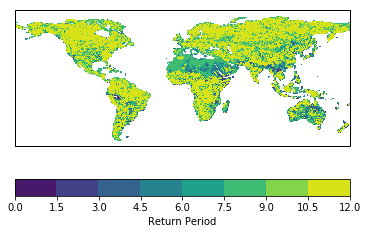

In [8]:
import cartopy

fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.Robinson(central_longitude=0, globe=None))

contour_plot = ax.contourf(lon,lat,np.transpose(colors))
cbar = plt.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Return Period')

ax.coastlines()


In [1]:
import matplotlib.pyplot as plt 
import cartopy

#fig = plt.figure()
#ax_cartopy = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
#ax_cartopy.coastlines()